In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score

In [2]:
heart_data = pd.read_csv('heart.csv')
df = pd.DataFrame(heart_data)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
# x contains all the rowa of all the columns execpt the last one (Target)
# y contains all the rows of only the last column (target) 
x = df.drop('target', axis=1)  # Adjust 'target_column' to the column name of your target variable
y = df['target']

In [15]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [45]:
# spliting the data into x_tarin , x_test , y_train , y_test 
# x_train: Training data for the features.
# x_test: Testing data for the features.
# y_train: Training data for the target variable.
# y_test: Testing data for the target variable.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [17]:
# scaling the data (Z-scale normalization)
std_sc=StandardScaler()

In [18]:
std_sc

StandardScaler()

In [19]:
# scaling the data into normal form 
# having mean = 0 , standard deviation =1 
x_train_new=std_sc.fit_transform(x_train)
x_test_new=std_sc.fit_transform(x_test)

<Axes: xlabel='cp'>

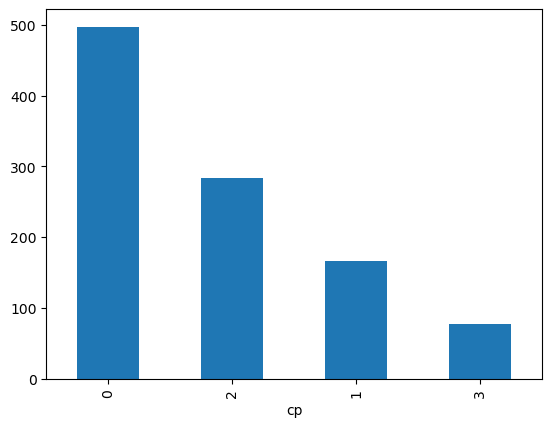

In [20]:
df['cp'].value_counts().plot.bar()

<Axes: xlabel='sex', ylabel='Density'>

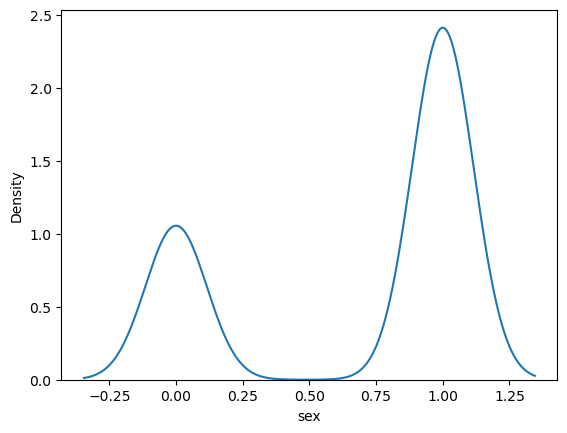

In [21]:
sns.kdeplot(df['sex'])

<Axes: xlabel='cp', ylabel='count'>

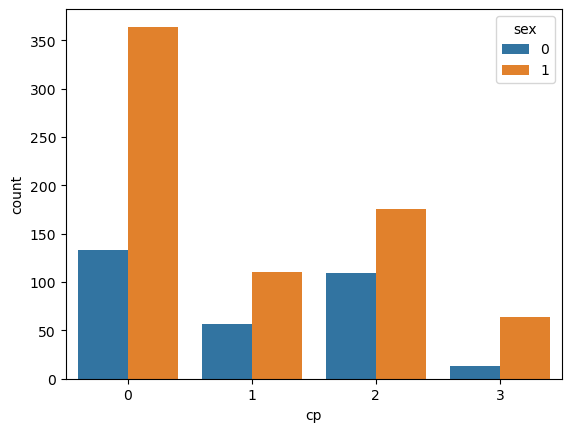

In [22]:
sns.countplot(x=df['cp'],hue=df['sex'])

<Axes: xlabel='sex', ylabel='count'>

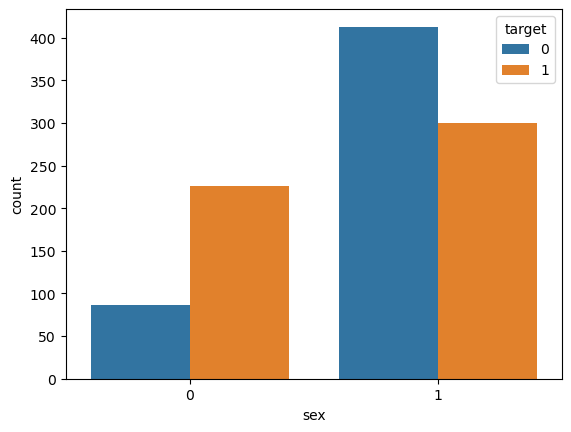

In [23]:
sns.countplot(x=df['sex'],hue=df['target'])

<Axes: xlabel='age'>

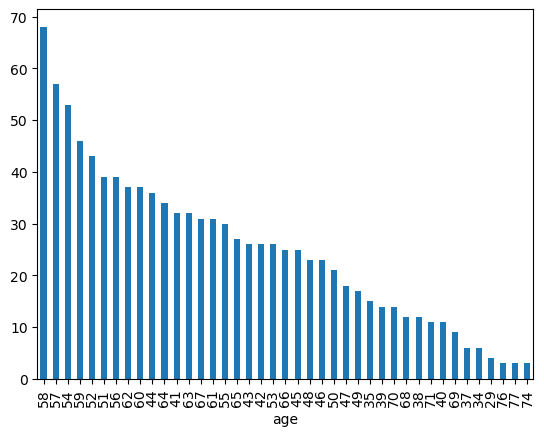

In [24]:
df['age'].value_counts().plot.bar()

<Axes: xlabel='age', ylabel='Count'>

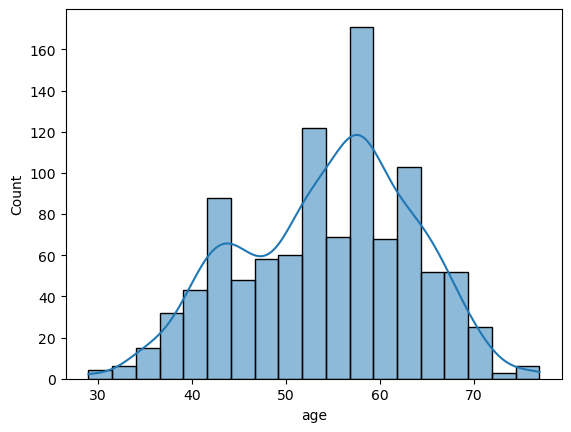

In [25]:
sns.histplot(df['age'],kde='true')

<Axes: xlabel='sex', ylabel='Density'>

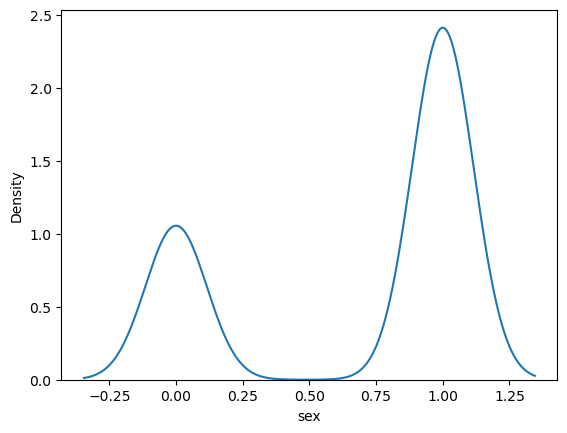

In [26]:
sns.kdeplot(df['sex'])

<Axes: >

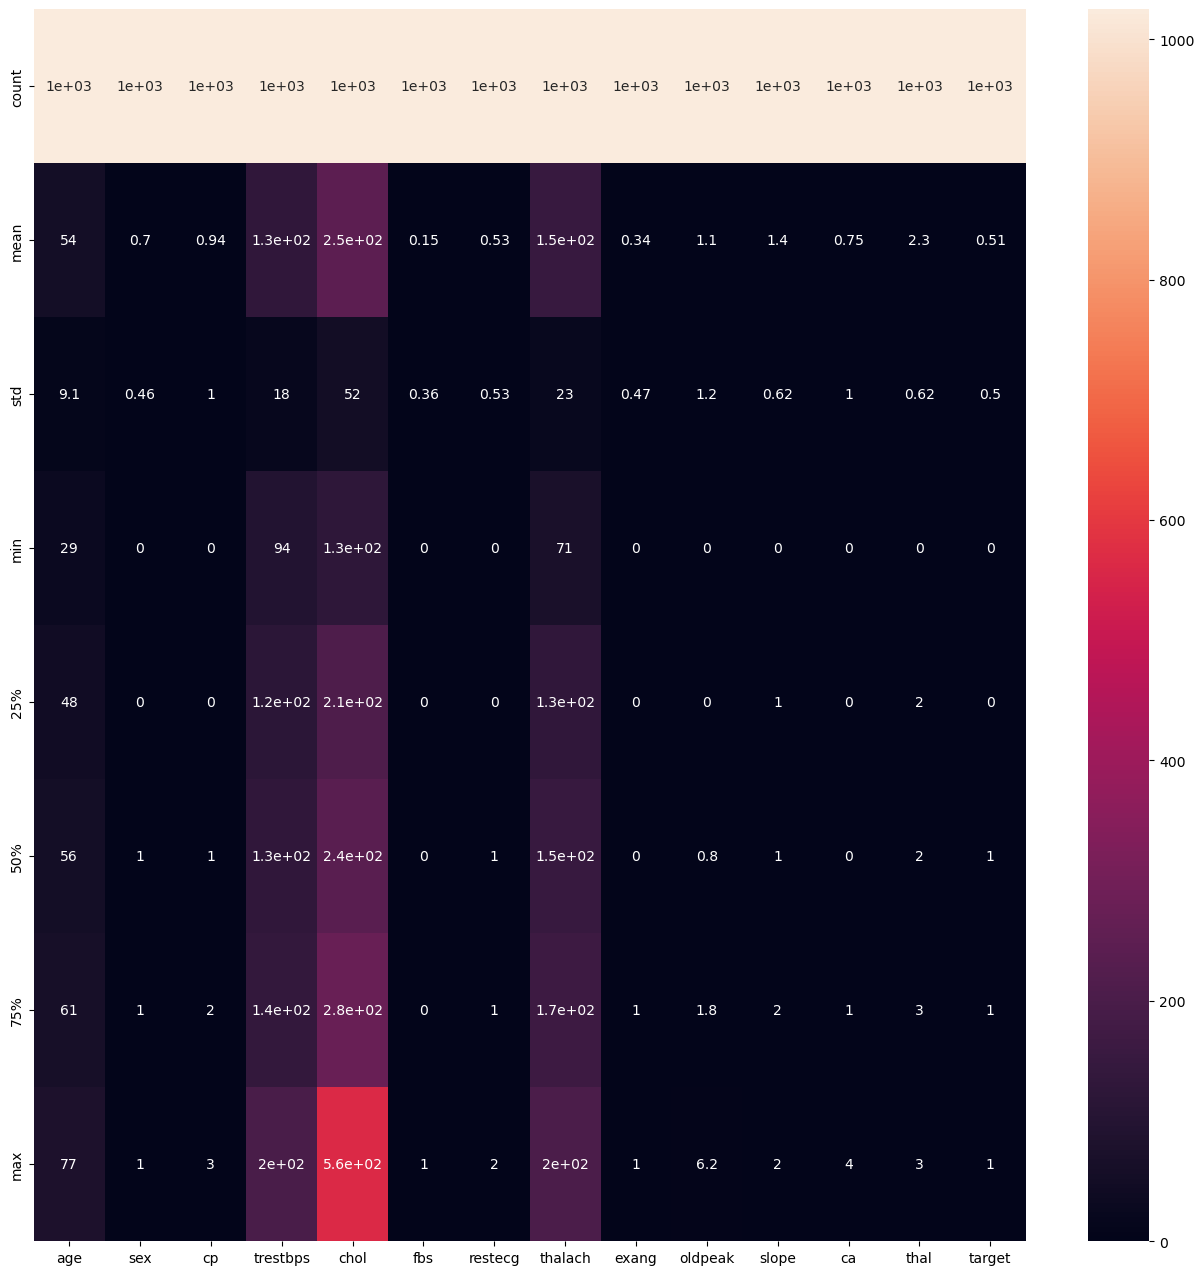

In [27]:
plt.figure(figsize=(16,16))
sns.heatmap(df.describe(),annot=True)

In [55]:
x_train_new = np.array(x_train_new)
y_train = np.array(y_train)

In [56]:
print(f"x_train_new length: {len(x_train_new)}")
print(f"y_train length: {len(y_train)}")

x_train_new length: 922
y_train length: 923


In [57]:
if len(x_train_new) > len(y_train):
    x_train_new = x_train_new[:len(y_train)]
elif len(y_train) > len(x_train_new):
    y_train = y_train[:len(x_train_new)]

In [58]:
print(f"New x_train_new length: {len(x_train_new)}")
print(f"New y_train length: {len(y_train)}")

New x_train_new length: 922
New y_train length: 922


In [46]:
# using knn model 
knn = KNeighborsClassifier(n_neighbors=10) 

In [47]:
# training knn model with the values given in train 
knn.fit(x_train_new, y_train)

KNeighborsClassifier(n_neighbors=10)

In [48]:
# perdict the result from the values given in x_test
x_pred = knn.predict(x_test_new)

In [49]:
x_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [50]:
accuracy = accuracy_score(y_test, x_pred)
print(f'Accuracy from KNN: {accuracy:.2f}')
recall = recall_score(y_test, x_pred)
print(f'recall score  from KNN: {recall}')
f1 = f1_score(y_test, x_pred)
print(f'recall score  from KNN: {f1}')
roc_auc = roc_auc_score(y_test, knn.predict_proba(x_test_new)[:, 1])
print(f'ROC AUC  from KNN: {roc_auc}')

Accuracy from KNN: 0.80
recall score  from KNN: 0.8444444444444444
recall score  from KNN: 0.7835051546391751
ROC AUC  from KNN: 0.9239463601532567


In [51]:
x_train_pred = knn.predict(x_train)
x_test_pred = knn.predict(x_test)
train_accuracy = accuracy_score(y_train, x_train_pred)
test_accuracy = accuracy_score(y_test, x_test_pred)
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.52
Test Accuracy: 0.44


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


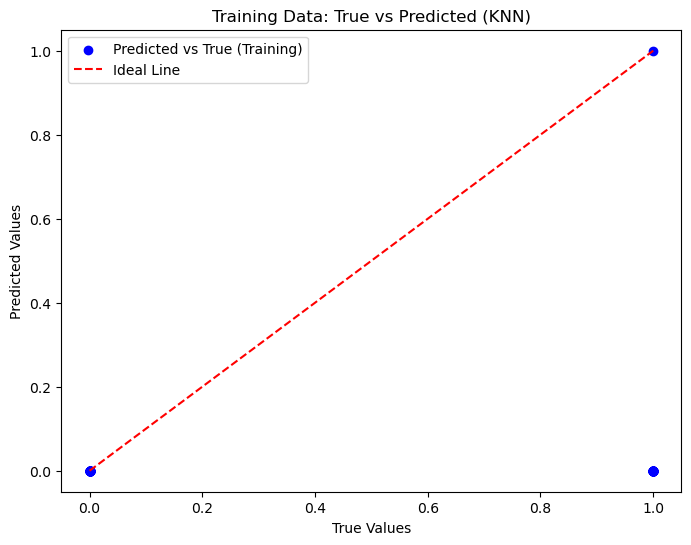

In [138]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, x_train_pred, color='blue', label='Predicted vs True (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='red', label='Ideal Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Training Data: True vs Predicted (KNN)')
plt.legend()
plt.show()

In [52]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
train_scores = []
test_scores = []
for train_index, test_index in kfold.split(X):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    knn.fit(x_train, y_train)
    train_score = knn.score(x_train, y_train)
    train_scores.append(train_score)
    
    test_score = knn.score(x_test, y_test)
    test_scores.append(test_score)
    
print(f'Mean training accuracy: {np.mean(train_scores):.2f}')
print(f'Mean test accuracy: {np.mean(test_scores):.2f}')

Mean training accuracy: 0.76
Mean test accuracy: 0.72


In [53]:
# Naive Bayes 
nb = GaussianNB()

In [59]:
nb.fit(x_train_new, y_train)

GaussianNB()

In [60]:
x_pred = nb.predict(x_test_new)

In [65]:
if len(y_test) > len(x_pred):
    y_test = y_test[:len(x_pred)]
elif len(x_pred) > len(y_test):
    x_pred = x_pred[:len(y_test)]

In [72]:
print(len(y_test))
print(len(x_pred))

102
102


In [75]:
accuracy = accuracy_score(y_test, x_pred)
print(f'Accuracy from Naive Bayes: {accuracy:.2f}')
recall = recall_score(y_test, x_pred)
print(f'recall score from Naive Bayes: {recall}')
f1 = f1_score(y_test, x_pred)
print(f'recall score from Naive Bayes: {f1}')
roc_auc = roc_auc_score(y_test, knn.predict_proba(x_test)[:, 1])
print(f'ROC AUC from Naive Bayes: {roc_auc}')

Accuracy from Naive Bayes: 0.52
recall score from Naive Bayes: 0.6730769230769231
recall score from Naive Bayes: 0.588235294117647
ROC AUC from Naive Bayes: 0.7690384615384616


In [107]:
if len(y_train) > len(x_train_pred):
    y_train = y_train[:len(x_train_pred)]
elif len(x_train_pred) > len(y_train):
    x_train_pred = x_train_pred[:len(y_train)]

In [108]:
print(f"New y_train length: {len(y_train)}")
print(f"New x_train_pred length: {len(x_train_pred)}")

New y_train length: 102
New x_train_pred length: 102


In [116]:
x_train_pred = nb.predict(x_train)
x_test_pred = nb.predict(x_test)
train_accuracy = accuracy_score(y_train, x_train_pred)
test_accuracy = accuracy_score(y_test, x_test_pred)
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

In [137]:
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.scatter(x_test, y_pred, color='red', label='Predicted')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.legend()
plt.title('Actual vs Predicted UnitPrice')
plt.show()

In [82]:
dt = DecisionTreeClassifier()

In [83]:
dt.fit(x_train_new, y_train)

DecisionTreeClassifier()

In [84]:
x_pred = dt.predict(x_test_new)

In [85]:
x_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [87]:
if len(y_test) > len(x_pred):
    y_test = y_test[:len(x_pred)]
elif len(x_pred) > len(y_test):
    x_pred = x_pred[:len(y_test)]

In [90]:
accuracy = accuracy_score(y_test, x_pred)
print(f'Accuracy for DecisionTreeClassifier: {accuracy:.2f}')
recall = recall_score(y_test, x_pred)
print(f'recall score for DecisionTreeClassifier: {recall}')
f1 = f1_score(y_test, x_pred)
print(f'recall score for DecisionTreeClassifier: {f1}')
roc_auc = roc_auc_score(y_test, knn.predict_proba(x_test)[:, 1])
print(f'ROC AUC for DecisionTreeClassifier: {roc_auc}')

Accuracy for DecisionTreeClassifier: 0.49
recall score for DecisionTreeClassifier: 0.5384615384615384
recall score for DecisionTreeClassifier: 0.5185185185185186
ROC AUC for DecisionTreeClassifier: 0.7690384615384616


In [101]:
# to ccheck for overfiting in KNN
# y_train, x_train_pred
if len(y_train) > len(x_train_pred):
    y_train = y_train[:len(x_train_pred)]
elif len(x_train_pred) > len(y_train):
    x_train_pred = x_train_pred[:len(y_train)]

In [102]:
x_train_pred = dt.predict(x_train)
x_test_pred = dt.predict(x_test)
train_accuracy = accuracy_score(y_train, x_train_pred)
test_accuracy = accuracy_score(y_test, x_test_pred)
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

Training Accuracy: 0.63
Test Accuracy: 0.58


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


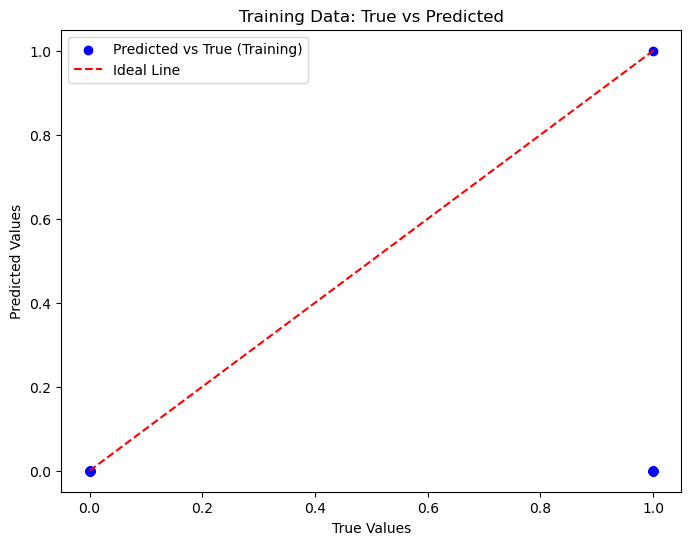

In [135]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, x_train_pred, color='blue', label='Predicted vs True (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='red', label='Ideal Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Training Data: True vs Predicted')
plt.legend()
plt.show()

In [103]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
train_scores = []
test_scores = []
for train_index, test_index in kfold.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    dt.fit(x_train, y_train)
    
    train_score = knn.score(x_train, y_train)
    train_scores.append(train_score)
    
    test_score = knn.score(x_test, y_test)
    test_scores.append(test_score)
    
print(f'Mean training accuracy: {np.mean(train_scores):.2f}')
print(f'Mean test accuracy: {np.mean(test_scores):.2f}')

Mean training accuracy: 0.75
Mean test accuracy: 0.75
